### 1. Knihovny a moduly pro matematické výpočty 
 
Zadání: 
V tomto kurzu jste se učili s některými vybranými knihovnami. Některé sloužily pro rychlé vektorové operace, jako numpy, některé mají naprogramovány symbolické manipulace, které lze převést na numerické reprezentace (sympy), některé mají v sobě funkce pro numerickou integraci (scipy). Některé slouží i pro rychlé základní operace s čísly (numba). 


In [2]:
import numpy as np
import timeit
from scipy.integrate import quad

# Funkce pro měření času s vyšší přesností
def measure_time(func, *args):
    start = timeit.default_timer()
    func(*args)
    return timeit.default_timer() - start

# Skalární součin v Pythonu (bez NumPy)
def scalar_product_python(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

# Numerická integrace (Trapezoidal rule)
def integrate_python(func, a, b, steps=1000):
    step = (b - a) / steps
    integral = 0.5 * (func(a) + func(b))
    for i in range(1, steps):
        integral += func(a + i * step)
    return integral * step

# Fourierova transformace v Pythonu
def fourier_transform_python(signal):
    N = len(signal)
    return [sum(signal[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N)) for k in range(N)]

# Gaussova eliminace pro řešení soustavy rovnic
def solve_linear_system_python(A, b):
    n = len(b)
    for i in range(n):
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
    # Zpětná substituce
    x = [0] * n
    for i in range(n-1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i-1, -1, -1):
            b[j] -= A[j][i] * x[i]
    return x

# Násobení matic v Pythonu
def matrix_multiplication_python(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Testovací data
vec1 = np.random.rand(1000)
vec2 = np.random.rand(1000)
signal = np.random.rand(1000)
A = np.random.rand(10, 10)  # Koefficientní matice
b = np.random.rand(10)
B = np.random.rand(10, 10)  # Druhá matice pro násobení

# Měření časů
times = {}

# Skalární součin
times['Skalární součin v Pythonu'] = measure_time(scalar_product_python, vec1, vec2)
times['Skalární součin v NumPy'] = measure_time(np.dot, vec1, vec2)
print("\n") 
# Numerická integrace
times['Numerická integrace v Pythonu'] = measure_time(integrate_python, np.sin, 0, np.pi)
times['Numerická integrace ve SciPy'] = measure_time(quad, np.sin, 0, np.pi)

# Fourierova transformace
times['Fourierova transformace v Pythonu'] = measure_time(fourier_transform_python, signal)
times['Fourierova transformace v NumPy'] = measure_time(np.fft.fft, signal)

# Řešení soustavy rovnic
times['Řešení soustavy rovnic v Pythonu'] = measure_time(solve_linear_system_python, A.tolist(), b.tolist())
times['Řešení soustavy rovnic v NumPy'] = measure_time(np.linalg.solve, A, b)

# Násobení matic
times['Násobení matic v Pythonu'] = measure_time(matrix_multiplication_python, A.tolist(), B.tolist())
times['Násobení matic v NumPy'] = measure_time(np.dot, A, B)

# Výpis výsledků
for operation, timing in times.items():
    print(f"{operation}: {timing:.10f} seconds")
 



Skalární součin v Pythonu: 0.0003852000 seconds
Skalární součin v NumPy: 0.0000157000 seconds
Numerická integrace v Pythonu: 0.0030131000 seconds
Numerická integrace ve SciPy: 0.0012151000 seconds
Fourierova transformace v Pythonu: 3.6925207000 seconds
Fourierova transformace v NumPy: 0.0123360000 seconds
Řešení soustavy rovnic v Pythonu: 0.0001299000 seconds
Řešení soustavy rovnic v NumPy: 0.0001208000 seconds
Násobení matic v Pythonu: 0.0002543000 seconds
Násobení matic v NumPy: 0.0000224000 seconds


### 2. Vizualizace dat 
 
Zadání: 
V jednom ze cvičení jste probírali práci s moduly pro vizualizaci dat. Mezi nejznámější moduly patří matplotlib (a jeho nadstavby jako seaborn), pillow, opencv, aj. Vyberte si nějakou zajímavou datovou sadu na webovém portále Kaggle a proveďte datovou analýzu datové sady. Využijte k tomu různé typy grafů a interpretujte je (minimálně alespoň 5 zajímavých grafů)​. Příklad interpretace: z datové sady pro počasí vyplynulo z liniového grafu, že v létě je vyšší rozptyl mezi minimální a maximální hodnotou teploty. Z jiného grafu vyplývá, že v létě je vyšší průměrná vlhkost vzduchu. Důvodem vyššího rozptylu může být absorpce záření vzduchem, který má v létě vyšší tepelnou kapacitu. 


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


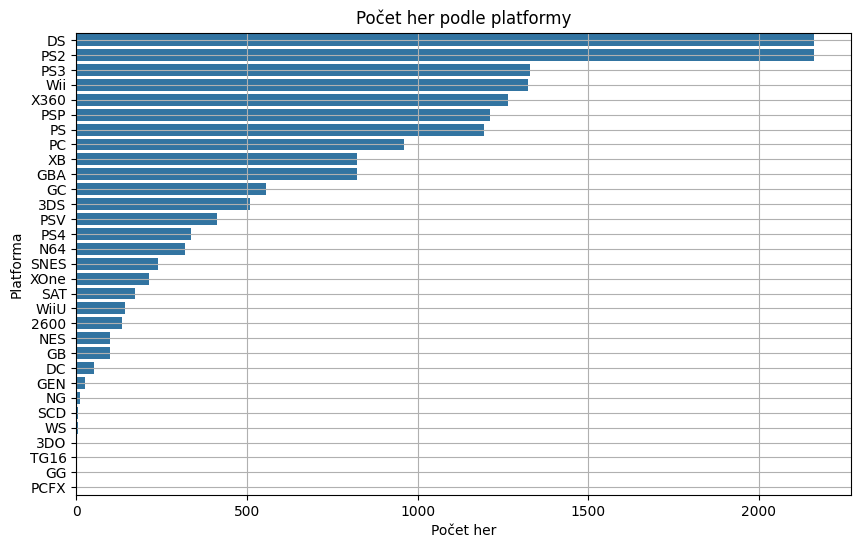

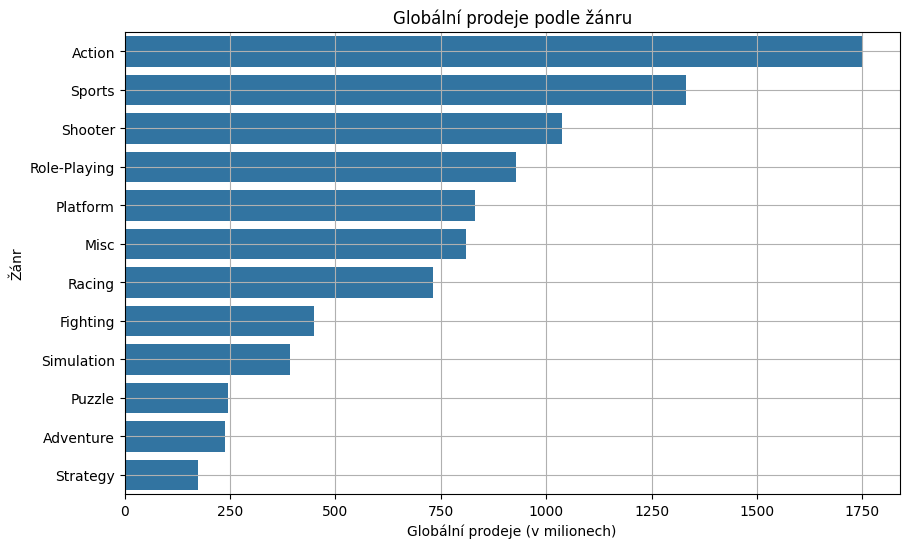

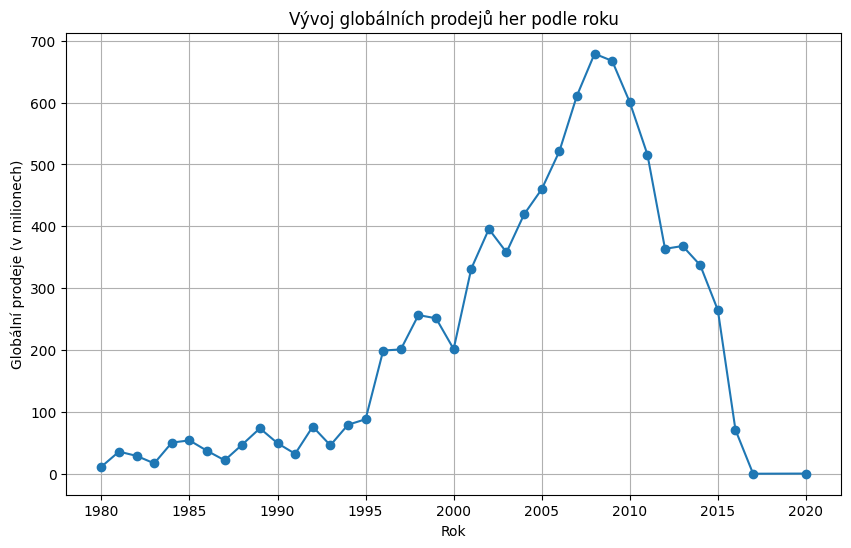

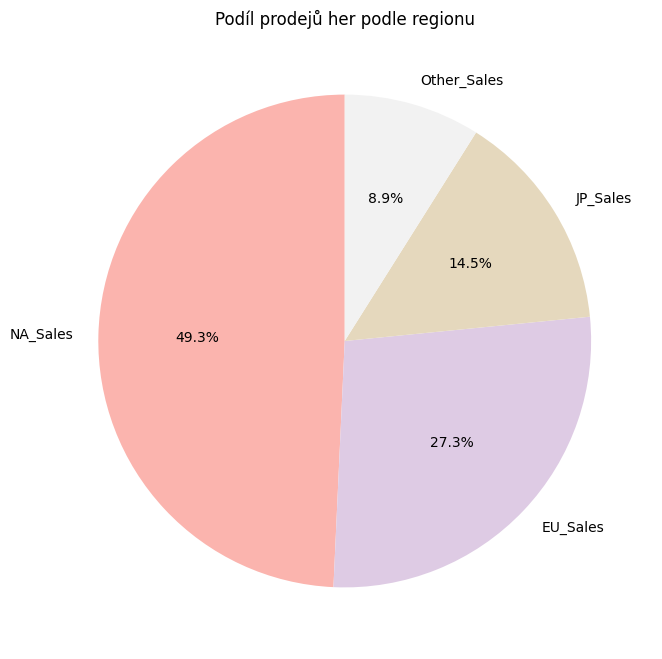

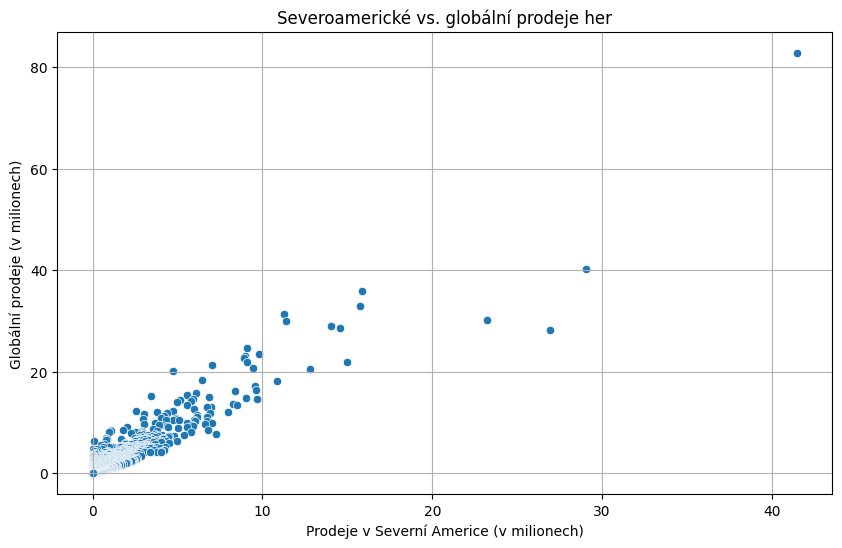

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cesta k CSV souboru
csv_path = r"C:\Users\Adam\OneDrive\Plocha\vgsales.csv"

# Načtení CSV souboru
data = pd.read_csv(csv_path)

# Zobrazení prvních několika řádků datové sady pro kontrolu
print(data.head())

# Vizualizace dat

# Graf 1: Počet her podle platformy
plt.figure(figsize=(10, 6))
sns.countplot(y="Platform", data=data, order=data["Platform"].value_counts().index)
plt.title("Počet her podle platformy")
plt.xlabel("Počet her")
plt.ylabel("Platforma")
plt.grid(True)
plt.show()

# Graf 2: Celkové globální prodeje podle žánru
plt.figure(figsize=(10, 6))
genre_sales = data.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title("Globální prodeje podle žánru")
plt.xlabel("Globální prodeje (v milionech)")
plt.ylabel("Žánr")
plt.grid(True)
plt.show()

# Graf 3: Vývoj prodejů her v průběhu let
plt.figure(figsize=(10, 6))
year_sales = data.groupby("Year")["Global_Sales"].sum()
plt.plot(year_sales.index, year_sales.values, marker="o", linestyle="-")
plt.title("Vývoj globálních prodejů her podle roku")
plt.xlabel("Rok")
plt.ylabel("Globální prodeje (v milionech)")
plt.grid(True)
plt.show()

# Graf 4: Podíl prodejů podle regionu
plt.figure(figsize=(10, 6))
region_sales = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
region_sales.plot(kind="pie", autopct='%1.1f%%', startangle=90, figsize=(8, 8), colormap="Pastel1")
plt.title("Podíl prodejů her podle regionu")
plt.ylabel("")
plt.show()

# Graf 5: Scatter plot prodejů her podle globálních a severoamerických prodejů
plt.figure(figsize=(10, 6))
sns.scatterplot(x="NA_Sales", y="Global_Sales", data=data)
plt.title("Severoamerické vs. globální prodeje her")
plt.xlabel("Prodeje v Severní Americe (v milionech)")
plt.ylabel("Globální prodeje (v milionech)")
plt.grid(True)
plt.show()


### 3. Úvod do lineární algebry 
 
Zadání: 
Důležitou částí studia na přírodovědecké fakultě je podobor matematiky zvaný lineární algebra. Poznatky tohoto oboru jsou základem pro oblasti jako zpracování obrazu, strojové učení nebo návrh mechanických soustav s definovanou stabilitou. Základní úlohou v lineární algebře je nalezení neznámých v soustavě lineárních rovnic. Na hodinách jste byli obeznámeni s přímou a iterační metodou pro řešení soustav lineárních rovnic. Vaším úkolem je vytvořit graf, kde na ose x bude velikost čtvercové matice a na ose y průměrný čas potřebný k nalezení uspokojivého řešení. Cílem je nalézt takovou velikost matice, od které je výhodnější využít iterační metodu.


c:\Users\Adam\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\linalg\_isolve\iterative.py:378: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = rho_cur / dotprod(p, q)
c:\Users\Adam\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\linalg\_isolve\iterative.py:372: RuntimeWarning: invalid value encountered in add
  p += z


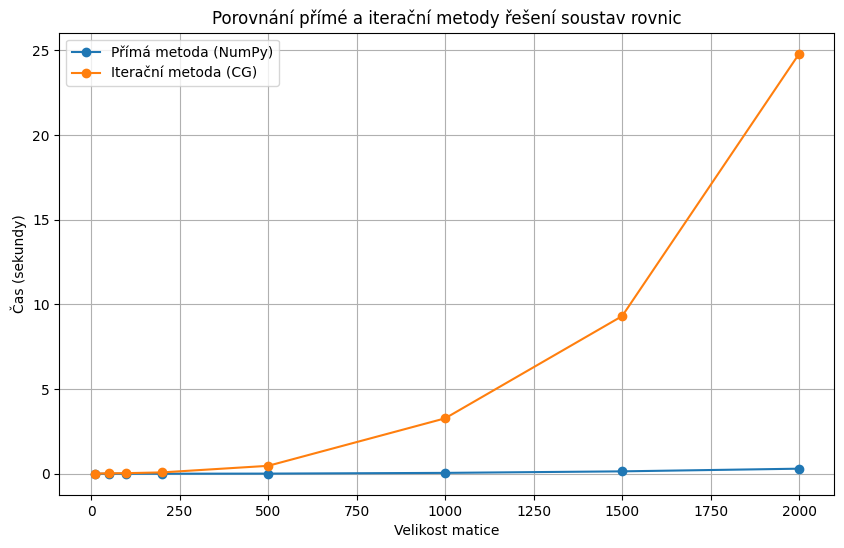

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.sparse.linalg import cg  # Conjugate Gradient method (iterační metoda)

# Funkce pro výpočet s přímou metodou pomocí NumPy
def vypocet_primou_metodou(A, b):
    start = time.time()
    reseni = np.linalg.solve(A, b)
    return time.time() - start

# Funkce pro výpočet s iterační metodou (Conjugate Gradient)
def vypocet_iteracni_metodou(A, b):
    start = time.time()
    reseni, stav = cg(A, b)
    return time.time() - start

# Seznam různých velikostí matic, na kterých budeme testovat
velikosti_matic = [10, 50, 100, 200, 500, 1000, 1500, 2000]

# Uchovávání časů pro každou metodu
casy_primy = []
casy_iteracni = []

# Smyčka pro měření časů na různých velikostech matic
for n in velikosti_matic:
    # Generování náhodné soustavy lineárních rovnic
    matice = np.random.rand(n, n)
    vektor = np.random.rand(n)

    # Měření času pro přímou metodu
    cas_primy = vypocet_primou_metodou(matice, vektor)
    casy_primy.append(cas_primy)

    # Měření času pro iterační metodu (CG)
    cas_iteracni = vypocet_iteracni_metodou(matice, vektor)
    casy_iteracni.append(cas_iteracni)

# Vykreslení grafu s výsledky
plt.figure(figsize=(10, 6))
plt.plot(velikosti_matic, casy_primy, label='Přímá metoda (NumPy)', marker='o')
plt.plot(velikosti_matic, casy_iteracni, label='Iterační metoda (CG)', marker='o')
plt.xlabel('Velikost matice')
plt.ylabel('Čas (sekundy)')
plt.title('Porovnání přímé a iterační metody řešení soustav rovnic')
plt.legend()
plt.grid(True)
plt.show()

### 5. Hledání kořenů rovnice 
 
Zadání: 
Vyhledávání hodnot, při kterých dosáhne zkoumaný signál vybrané hodnoty je důležitou součástí analýzy časových řad. Pro tento účel existuje spousta zajímavých metod. Jeden typ metod se nazývá ohraničené (například metoda půlení intervalu), při kterých je zaručeno nalezení kořenu, avšak metody typicky konvergují pomalu. Druhý typ metod se nazývá neohraničené, které konvergují rychle, avšak svojí povahou nemusí nalézt řešení (metody využívající derivace). Vaším úkolem je vybrat tři různorodé funkce (například polynomiální, exponenciální/logaritmickou, harmonickou se směrnicí, aj.), které mají alespoň jeden kořen a nalézt ho jednou uzavřenou a jednou otevřenou metodou. Porovnejte časovou náročnost nalezení kořene a přesnost nalezení.  


In [5]:
import numpy as np
import time

# Půlení intervalu
def puleni(f, a, b, tol=1e-10, max_iterace=1000):
    for _ in range(max_iterace):
        stred = (a + b) / 2
        if abs(f(stred)) < tol:
            return stred
        elif f(a) * f(stred) < 0:
            b = stred
        else:
            a = stred
    return (a + b) / 2

# Newtonova metoda
def newton(f, df, x0, tol=1e-10, max_iterace=1000):
    for _ in range(max_iterace):
        x_nove = x0 - f(x0) / df(x0)
        if abs(x_nove - x0) < tol:
            return x_nove
        x0 = x_nove
    return x0

# Měření času s vyšší přesností
def zmer(funkce, *args):
    start = time.perf_counter()  # Přesnější měření času
    vysledek = funkce(*args)
    return vysledek, time.perf_counter() - start

# Definice funkcí a derivací
def polynom(x):
    return x**3 - 6*x**2 + 11*x - 6

def d_polynom(x):
    return 3*x**2 - 12*x + 11

def exponencialni(x):
    return np.exp(x) - 2

def d_exponencialni(x):
    return np.exp(x)

def sinus(x):
    return np.sin(x) - 0.5

def d_sinus(x):
    return np.cos(x)

# Hlavní program
if __name__ == "__main__":
    funkce = [
        ("Polynom", polynom, d_polynom, 1, 3, 2),
        ("Exponenciální", exponencialni, d_exponencialni, 0, 2, 1),
        ("Sinus", sinus, d_sinus, 0, 2, 1)
    ]
    
    for nazev, f, df, a, b, x0 in funkce:
        print(f"\n{nazev}:")
        
        koren_puleni, cas_puleni = zmer(puleni, f, a, b)
        print(f"Půlení intervalu: Kořen = {koren_puleni:.10f}, Čas = {cas_puleni:.6f} s")
        
        koren_newton, cas_newton = zmer(newton, f, df, x0)
        print(f"Newtonova metoda: Kořen = {koren_newton:.10f}, Čas = {cas_newton:.6f} s")



Polynom:
Půlení intervalu: Kořen = 2.0000000000, Čas = 0.000015 s
Newtonova metoda: Kořen = 2.0000000000, Čas = 0.000010 s

Exponenciální:
Půlení intervalu: Kořen = 0.6931471806, Čas = 0.000397 s
Newtonova metoda: Kořen = 0.6931471806, Čas = 0.000054 s

Sinus:
Půlení intervalu: Kořen = 0.5235987755, Čas = 0.000442 s
Newtonova metoda: Kořen = 0.5235987756, Čas = 0.000054 s


### 6. Generování náhodných čísel a testování generátorů 
 
Zadání: 
Tento úkol bude poněkud kreativnější charakteru. Vaším úkolem je vytvořit vlastní generátor semínka do pseudonáhodných algoritmů. Jazyk Python umí sbírat přes ovladače hardwarových zařízení různá fyzická a fyzikální data. Můžete i sbírat data z historie prohlížeče, snímání pohybu myší, vyzvání uživatele zadat náhodné úhozy do klávesnice a jiná unikátní data uživatelů.  


In [6]:
import random
import time
from pynput.mouse import Listener

# Proměnná pro záznam pohybů myši
pohyby = []

# Funkce pro sledování pohybů myši
def zaznamenej_pohyb(x, y):
    global pohyby
    pohyby.append((x, y))  # Uložení souřadnic myši

# Sledování myši po dobu 5 sekund
def sledovat_mys():
    print("Pohybujte myší pro vytvoření semínka...")
    with Listener(on_move=zaznamenej_pohyb) as listener:
        time.sleep(3)  # Sledujeme myš 3 sekund
        listener.stop()  # Ukončíme sledování

# Vytvoření semínka z pohybů myši a aktuálního času
def vytvor_seminko():
    cas = time.time()  # Aktuální čas
    soucet_souradnic = sum(x + y for x, y in pohyby)  # Sečtení souřadnic
    seminko = int(soucet_souradnic + cas) % 2**32  # Vytvoření 32bitového semínka
    return seminko

# Generování náhodných čísel na základě semínka
def generuj_nahodna_cisla(seminko, pocet=5):
    random.seed(seminko)
    return [random.random() for _ in range(pocet)]  # Vygenerujeme požadovaný počet čísel

# Hlavní program
if __name__ == "__main__":
    # Sledování myši
    sledovat_mys()

    # Vytvoření semínka
    seminko = vytvor_seminko()
    print(f"Vytvořené semínko: {seminko}")
    
    # Generování a zobrazení náhodných čísel
    cisla = generuj_nahodna_cisla(seminko)
    print("Vygenerovaná náhodná čísla:")
    for cislo in cisla:
        print(cislo)


Pohybujte myší pro vytvoření semínka...
Vytvořené semínko: 1726512902
Vygenerovaná náhodná čísla:
0.9941216098758854
0.21692426240814422
0.667329646816125
0.2898486373743753
0.7083316000854925


### 9. Integrace funkce jedné proměnné 
 
Zadání: 
V oblasti přírodních a sociálních věd je velice důležitým pojmem integrál, který představuje funkci součtů malých změn (počet nakažených covidem za čas, hustota monomerů daného typu při posouvání se v řetízku polymeru, aj.). Integraci lze provádět pro velmi jednoduché funkce prostou Riemannovým součtem, avšak pro složitější funkce je nutné využít pokročilé metody. Vaším úkolem je vybrat si 3 různorodé funkce (polynom, harmonická funkce, logaritmus/exponenciála) a vypočíst určitý integrál na dané funkci od nějakého počátku do nějakého konečného bodu. Porovnejte, jak si každá z metod poradila s vámi vybranou funkcí na základě přesnosti vůči analytickému řešení. 


In [7]:
import numpy as np
from scipy.integrate import quad, simpson

# Definice funkcí, které budeme integrovat
def polynomicka_funkce(x):
    return x**2

def harmonicka_funkce(x):
    return np.sin(x)

def exponencialni_funkce(x):
    return np.exp(x)

# Analytické řešení pro porovnání
def analyticke_reseni(f, a, b):
    if f == polynomicka_funkce:
        return (b**3) / 3 - (a**3) / 3
    elif f == harmonicka_funkce:
        return -np.cos(b) + np.cos(a)
    elif f == exponencialni_funkce:
        return np.exp(b) - np.exp(a)

# Numerická integrace pomocí metody Riemannova součtu
def riemannova_integrace(f, a, b, n=1000):
    x = np.linspace(a, b, n)
    dx = (b - a) / n
    return np.sum(f(x) * dx)

# Numerická integrace pomocí Simpsonova pravidla
def simpsonova_integrace(f, a, b, n=1000):
    x = np.linspace(a, b, n)
    y = f(x)
    dx = (b - a) / (n - 1)
    return simpson(y, dx=dx)

# Numerická integrace pomocí metody quad ze SciPy (přesná metoda)
def scipy_integrace(f, a, b):
    return quad(f, a, b)[0]

# Hlavní program
if __name__ == "__main__":
    # Definice počátečního a koncového bodu integrace
    a, b = 0, 1
    # Seznam funkcí, které budeme integrovat
    funkce = [
        ("Polynomická funkce", polynomicka_funkce),
        ("Harmonická funkce", harmonicka_funkce),
        ("Exponenciální funkce", exponencialni_funkce)
    ]
    
    # Cyklus přes jednotlivé funkce
    for nazev, f in funkce:
        print(f"\nIntegrace pro {nazev}:")
        
        # Analytické řešení
        analyticky_vysledek = analyticke_reseni(f, a, b)
        print(f"Analytické řešení: {analyticky_vysledek:.6f}")
        
        # Riemannova metoda
        riemann_vysledek = riemannova_integrace(f, a, b)
        print(f"Riemannův součet: {riemann_vysledek:.6f}")
        
        # Simpsonova metoda
        simpson_vysledek = simpsonova_integrace(f, a, b)
        print(f"Simpsonova metoda: {simpson_vysledek:.6f}")
        
        # SciPy integrace (quad)
        scipy_vysledek = scipy_integrace(f, a, b)
        print(f"SciPy (quad): {scipy_vysledek:.6f}")



Integrace pro Polynomická funkce:
Analytické řešení: 0.333333
Riemannův součet: 0.333500
Simpsonova metoda: 0.333333
SciPy (quad): 0.333333

Integrace pro Harmonická funkce:
Analytické řešení: 0.459698
Riemannův součet: 0.459659
Simpsonova metoda: 0.459698
SciPy (quad): 0.459698

Integrace pro Exponenciální funkce:
Analytické řešení: 1.718282
Riemannův součet: 1.718423
Simpsonova metoda: 1.718282
SciPy (quad): 1.718282
